<a href="https://colab.research.google.com/github/cwp-kr/ML-class/blob/main/13%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

data = np.array([[0, 2, 1, 0, 0],
                 [0, 2, 1, 1, 0],
                 [1, 2, 1, 0, 1],
                 [2, 1, 1, 0, 1],
                 [2, 0, 0, 0, 1],
                 [2, 0, 0, 1, 0],
                 [1, 0, 0, 1, 1],
                 [0, 1, 1, 0, 0],
                 [0, 0, 0, 0, 1],
                 [2, 1, 0, 0, 1],
                 [0, 1, 0, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 2, 0, 0, 1],
                 [2, 1, 1, 1, 0]])

X = data[:,0:4]
y = data[:,4]

# Information entropy 함수 정의
def entropy(y):
    # y의 고유값과 각각의 빈도수 계산
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()  # pk
    # 엔트로피 계산
    return -np.sum(p * np.log2(p))

# 전체 데이터의 엔트로피 계산
total_entropy = entropy(y)
print(f"전체 데이터 엔트로피: {total_entropy:.4f}")

#  피처별 정보 이득(Information Gain) 계산
for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        # 해당 값에 해당하는 데이터 인덱스
        idx = X[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f"Feature {feature_idx}의 정보 이득: {info_gain:.4f}")

전체 데이터 엔트로피: 0.9403
Feature 0의 정보 이득: 0.2467
Feature 1의 정보 이득: 0.0292
Feature 2의 정보 이득: 0.1518
Feature 3의 정보 이득: 0.0481


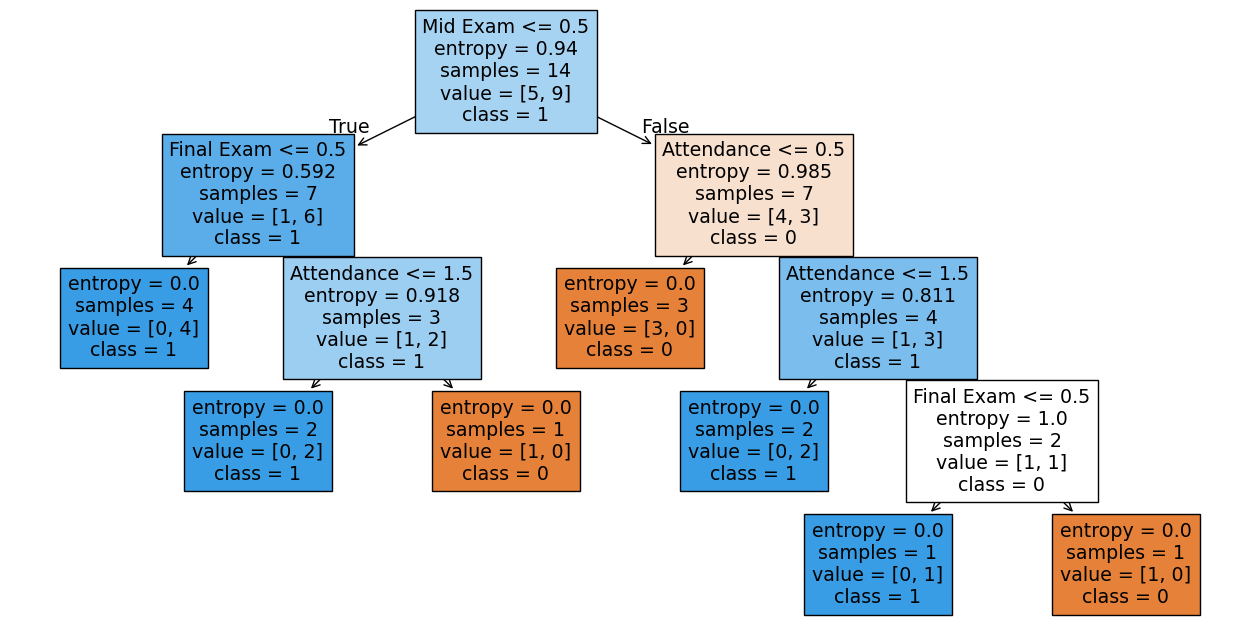

In [ ]:
# scikit-learn의 DecisionTreeClassifier를 엔트로피 기준으로 학습
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X, y)

# Decision Tree for binary classifier
plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=['Attendance', 'Assignment', 'Mid Exam', 'Final Exam'], class_names=['0', '1'], filled=True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')

In [ ]:
df['Sex']=df['Sex'].replace({'F':2,'M':1})
df['BP']=df['BP'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
df['Cholesterol']=df['Cholesterol'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
df['Drug']=df['Drug'].replace({'drugA':1,'drugB':2,'drugC':3,'drugX':4,'drugY':5})
df.head()

<ipython-input-24-7829f1d808f3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'F':2,'M':1})
<ipython-input-24-7829f1d808f3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP']=df['BP'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
<ipython-input-24-7829f1d808f3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,2,25.355,5
1,47,1,1,2,13.093,3
2,47,1,1,2,10.114,3
3,28,2,0,2,7.798,4
4,61,2,1,2,18.043,5


In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

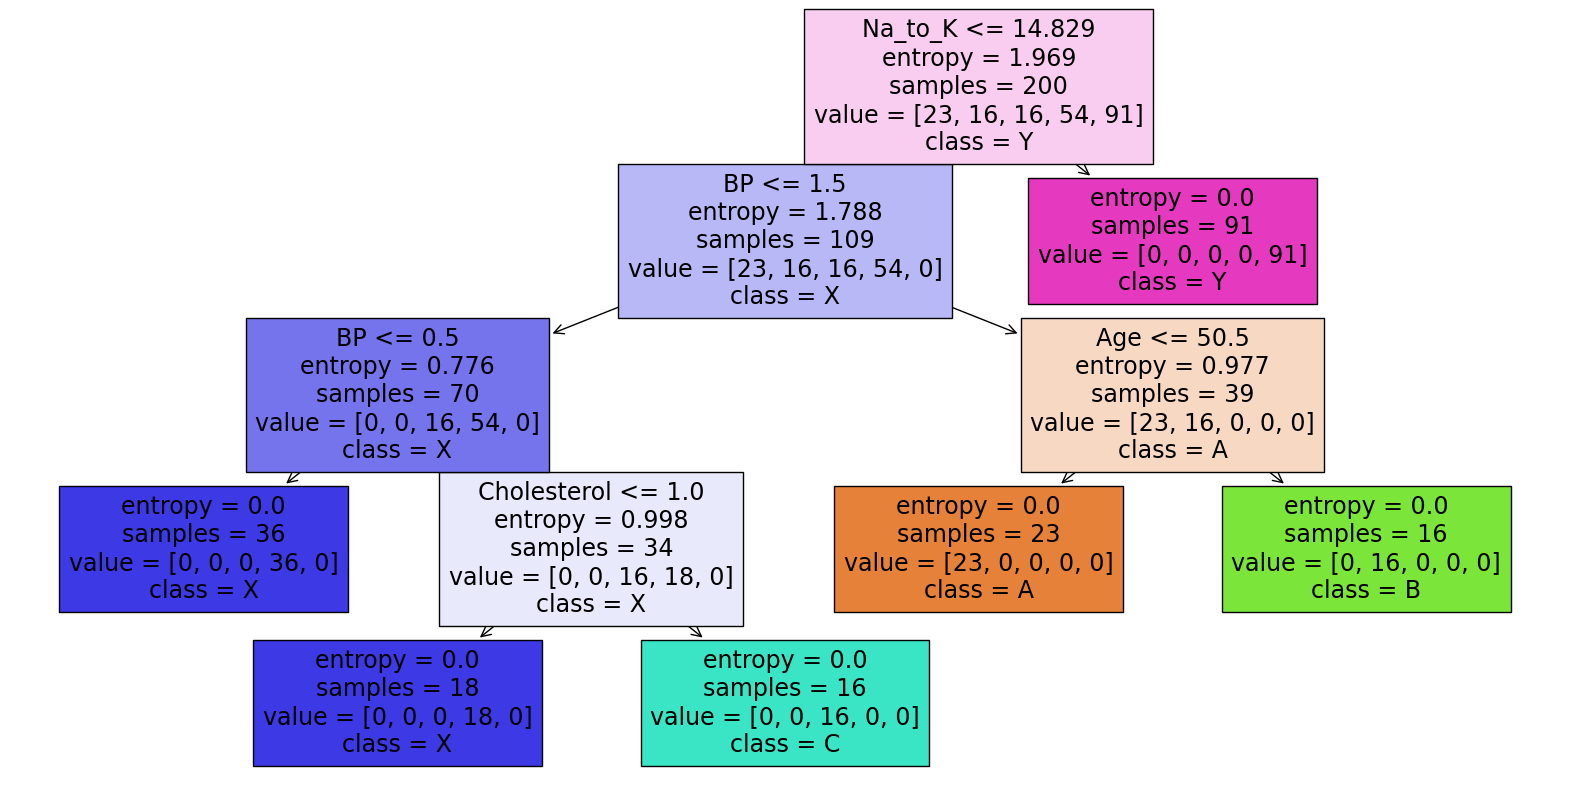

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['A', 'B', 'C', 'X', 'Y'], filled=True)
plt.show()